# **1. Importación de *modules***

In [455]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# **2. Importación del dataset *properatti_tp2.csv***

In [456]:
data = pd.read_csv("../data/properatti_tp2.csv", sep = ",", low_memory=False) 
data.head(3)
data.shape

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,am_garage,am_balcon,am_parrilla,am_piscina,am_terraza,am_patio,...,pn_Villa de Mayo,pn_Villa del Parque,pn_Village Golf & Tennis Country Club,pn_Virasoro Village,pn_Virrey del Pino,pn_Virreyes,pn_Wilde,pn_William Morris,pn_Zelaya,pn_coordenadas 34.255511
0,55.0,40.0,1127.272727,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,55.0,55.0,1309.090909,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,106.0,78.0,1226.415094,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


(41760, 467)

# **3. Tratamiento de los datos**

In [457]:
# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 16

<AxesSubplot:>

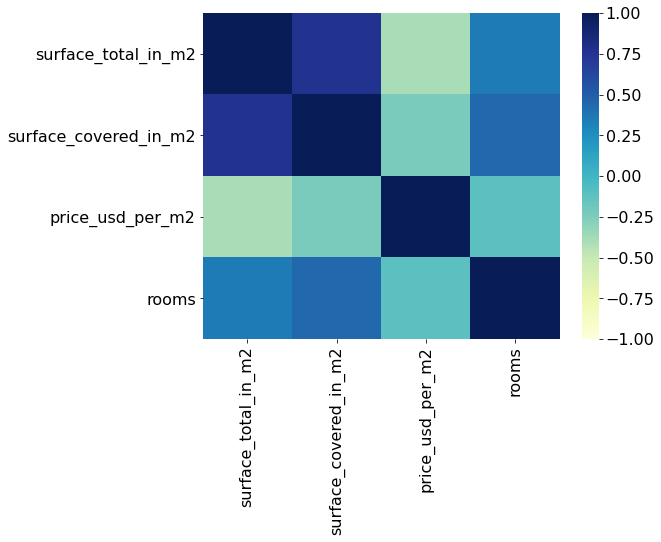

In [458]:
sns.heatmap(data.iloc[:, :4].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu")

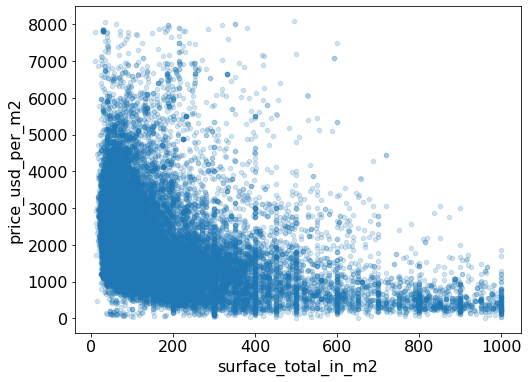

In [459]:
data.plot(kind='scatter',x='surface_total_in_m2', y='price_usd_per_m2', alpha=0.2);

# **4.Modelos**

## Creo una función que ingreso features y devuelve el MAE  train_test_mae

In [460]:
# Definimos una función que acepta una lista de features, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba MAE.

def train_test_mae(feature_cols):
    X = data[feature_cols]
    y = data.price_usd_per_m2
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.mean_absolute_error(y_test, y_pred)


In [461]:
train_test_mae(['surface_total_in_m2','surface_covered_in_m2','rooms'])

705.1883861779858

In [462]:
train_test_mae(['surface_total_in_m2'])

697.9425238951077

In [463]:
train_test_mae(['surface_covered_in_m2'])

724.2764619697847

In [464]:
train_test_mae(['rooms'])

759.8550278142445

## **4.1 Regresión lineal simple (RLS)**

### Regresión lineal simple (RLS) de a una feature a la vez **sin normalización**

#### funcion rls_func

In [465]:
def rls_func(X,y,columna):
    print( columna)
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage    shuffle=False
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1, shuffle = False)
    lm = LinearRegression() # Fiteamos el modelo sobre los vectores X e y.
    model = lm.fit(X, y)
    print(f'''    Coef\t{model.coef_}''')
    print(f'''    intercept\t{model.intercept_}''')
    test_sklearn = np.array(Xtest).reshape(-1,1)
    model.predict(test_sklearn)
    ypred = model.predict(Xtest)

    print(f'''    MAE\t{mean_absolute_error(ytest, ypred).round(2)}
    MSE\t{mean_squared_error(ytest, ypred).round(2)}
    RMSE\t{np.sqrt(mean_squared_error(ytest, ypred)).round(2)}
    R2\t{r2_score(ytest, ypred).round(2)}''')

    sns.regplot(data = data, x = columna, y = 'price_usd_per_m2', ci = 95, scatter_kws = {"color": "blue", 's': 10}, line_kws = {"color": "red"})
    #return metrics.mean_absolute_error(y_test, y_pred)



#### 4.1.1 Superficie total

*** Superficie total ***
surface_total_in_m2
    Coef	[-2.60476694]
    intercept	2486.650029615513
    MAE	698.03
    MSE	950952.85
    RMSE	975.17
    R2	0.09


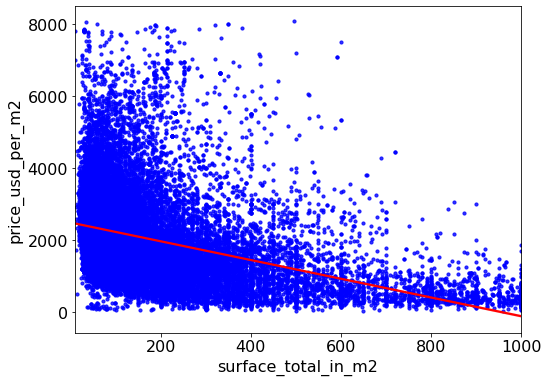

In [466]:
# Superficie total
print("*** Superficie total ***")
X = data[['surface_total_in_m2']]
y = data['price_usd_per_m2']
rls_func(X,y,'surface_total_in_m2')


#### 4.1.2 Superficie cubierta

*** Superficie cubierta ***
surface_covered_in_m2
    Coef	[-2.61384529]
    intercept	2381.775005041239
    MAE	721.53
    MSE	1016623.61
    RMSE	1008.28
    R2	0.03


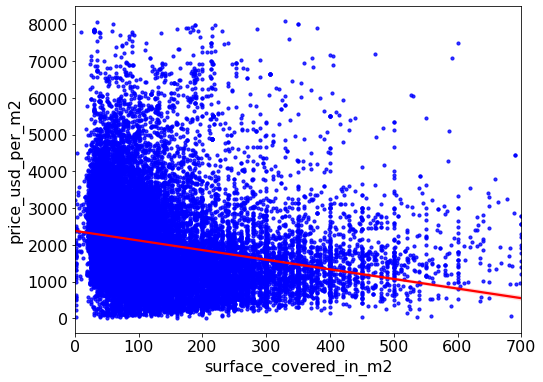

In [467]:
# Superficie cubierta
print("*** Superficie cubierta ***")
X = data[['surface_covered_in_m2']]
y = data['price_usd_per_m2']
rls_func(X,y,'surface_covered_in_m2')


#### 4.1.2 Habitaciones

*** rooms ***
rooms
    Coef	[-96.71856822]
    intercept	2353.1539851961998
    MAE	756.34
    MSE	1073322.81
    RMSE	1036.01
    R2	-0.03


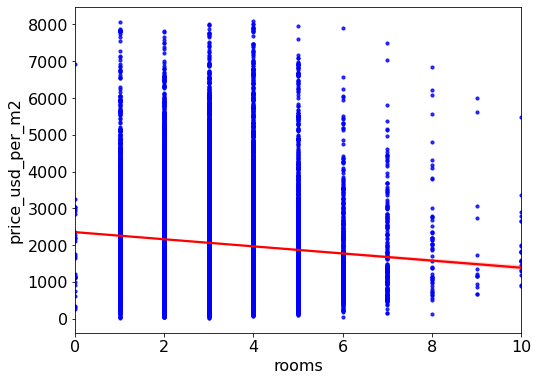

In [468]:
# Habitaciones
print("*** rooms ***")
X = data[['rooms']]
y = data['price_usd_per_m2']
rls_func(X,y,'rooms')

### 4.2 RLS a una feature a la vez **normalizando** (usando Scale)

Text(0.5, 0, 'SurfTot standardized')

Text(0, 0.5, 'PUPM standardized')

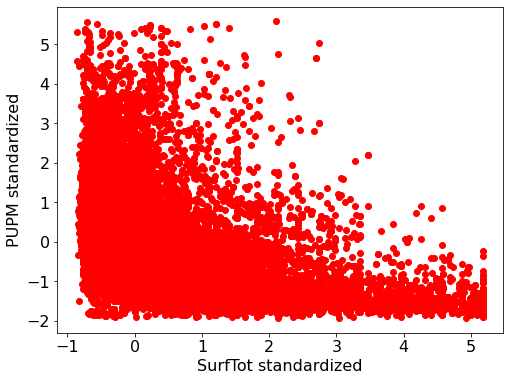

In [469]:
#Normalizo con surface_total_in_m2
xs = preprocessing.scale(data[["surface_total_in_m2"]])
ys = preprocessing.scale(data["price_usd_per_m2"])

plt.scatter(xs, ys, color='r')
plt.xlabel("SurfTot standardized")
plt.ylabel("PUPM standardized")
plt.show()

*** Superficie totalcon  Normalizacion  ***
surface_total_in_m2
    Coef	[-0.39805165]
    intercept	3.3293719466975197e-16
    MAE	0.65
    MSE	0.82
    RMSE	0.91
    R2	0.09


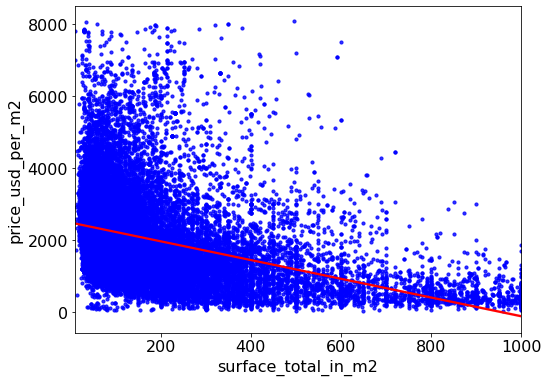

In [470]:
# Normalizo con surface_total_in_m2
print("*** Superficie totalcon  Normalizacion  ***")
X = preprocessing.scale(data[["surface_total_in_m2"]])
y = preprocessing.scale(data["price_usd_per_m2"])
rls_func(X,y,'surface_total_in_m2')

Comparando los resultados de la regresion lineal simple usando surface_total_in_m2 con y sin normalizacion se tiene:
Sin normalización: 
- MAE	700.94
- MSE	944445.18
- RMSE	971.83
- R2	0.16

Con Normalización
- MAE	0.65
- MSE	0.82
- RMSE	0.91
- R2	0.16

*** Superficie totalcon  Normalizacion  ***
surface_covered_in_m2
    Coef	[-0.23297531]
    intercept	3.2236609867148326e-16
    MAE	0.67
    MSE	0.88
    RMSE	0.94
    R2	0.03


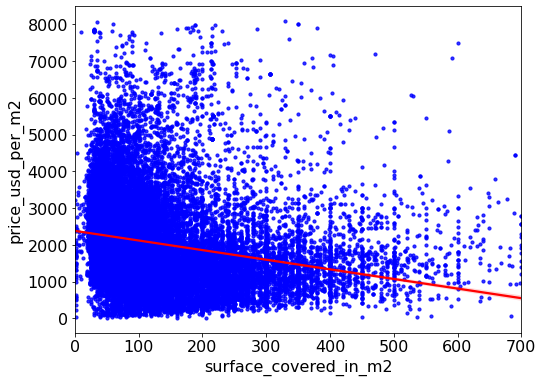

In [471]:
# Normalizo con ssurface_covered_in_m2
print("*** Superficie totalcon  Normalizacion  ***")
X = preprocessing.scale(data[["surface_covered_in_m2"]])
y = preprocessing.scale(data["price_usd_per_m2"])
rls_func(X,y,'surface_covered_in_m2')

*** Superficie totalcon  Normalizacion  ***
rooms
    Coef	[-0.10971564]
    intercept	3.3905849497890646e-16
    MAE	0.7
    MSE	0.93
    RMSE	0.96
    R2	-0.03


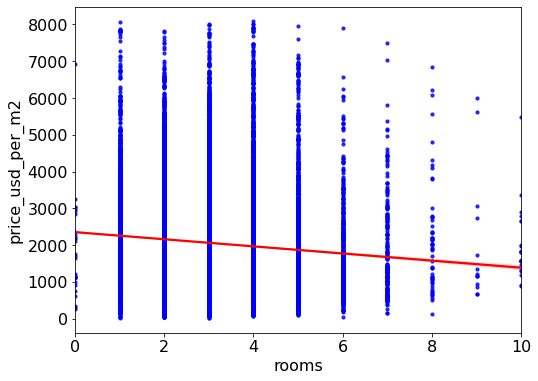

In [472]:
# Normalizo con rooms
print("*** Superficie totalcon  Normalizacion  ***")
X = preprocessing.scale(data[["rooms"]])
y = preprocessing.scale(data["price_usd_per_m2"])
rls_func(X,y,'rooms')

## **4.3 Regresión lineal múltiple (RLM)**

### 4.3.1 funcion que tome features y aplique RLM (rlm_func y rlm_func_orig)

In [473]:
# Definimos una función que acepta una lista de features, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba MAE.

def rlm_func(X,y):
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    print(f'''    
    Intercepto\t{linreg.intercept_.round(4)}
    MAE\t\t{mean_absolute_error(y_test, y_pred).round(4)}
    MSE\t\t{mean_squared_error(y_test, y_pred).round(4)}
    RMSE\t{np.sqrt(mean_squared_error(y_test, y_pred)).round(4)}
    R2\t\t{r2_score(y_test, y_pred).round(4)}
    ''')
    #Coef\t{linreg.coef_.round(4)}


In [474]:
def rlm_func_orig(X,y):
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X, y)
    y_pred = linreg.predict(X)
    
    print(f'''    
    Intercepto\t{linreg.intercept_.round(4)}
    MAE\t\t{mean_absolute_error(y, y_pred).round(4)}
    MSE\t\t{mean_squared_error(y, y_pred).round(4)}
    RMSE\t{np.sqrt(mean_squared_error(y, y_pred)).round(4)}
    R2\t\t{r2_score(y, y_pred).round(4)}
    ''')
    #    Coef\t{linreg.coef_.round(4)}
    
    plt.plot(y,y, '-.',c='grey')
    plt.scatter(y_pred, y, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicciones usando todas las variables")
    plt.ylabel("Valores reales ")
    plt.show()

### 4.3.2 RLM con las 3 features originales juntas **sin normalización**

In [475]:
feature_cols =['surface_total_in_m2','surface_covered_in_m2','rooms']
X = data[feature_cols]
y = data.price_usd_per_m2
rlm_func(X,y)

    
    Intercepto	2383.5634
    MAE		705.1884
    MSE		954164.5861
    RMSE	976.8135
    R2		0.0867
    


    
    Intercepto	2400.626
    MAE		711.1531
    MSE		954469.8835
    RMSE	976.9697
    R2		0.1722
    


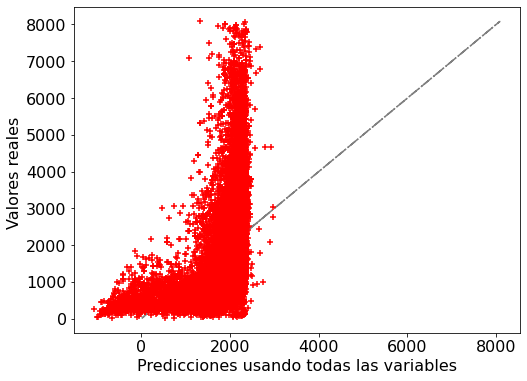

In [476]:
feature_cols =['surface_total_in_m2','surface_covered_in_m2','rooms']
X = data[feature_cols]
y = data.price_usd_per_m2
rlm_func_orig(X,y)

### 4.3.3 RLM con las 3 features originales juntas **Con normalización**  (usando Scale)

In [477]:
feature_cols =['surface_total_in_m2','surface_covered_in_m2','rooms']
xs_orig = preprocessing.scale(data[feature_cols])
ys_orig = preprocessing.scale(data["price_usd_per_m2"])

rlm_func(xs_orig,ys_orig)

    
    Intercepto	-0.0299
    MAE		0.6567
    MSE		0.8275
    RMSE	0.9097
    R2		0.0867
    


    
    Intercepto	0.0
    MAE		0.6623
    MSE		0.8278
    RMSE	0.9098
    R2		0.1722
    


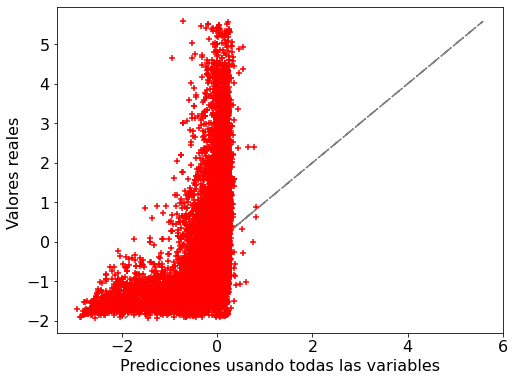

In [478]:
feature_cols =['surface_total_in_m2','surface_covered_in_m2','rooms']
xs_orig = preprocessing.scale(data[feature_cols])
ys_orig = preprocessing.scale(data["price_usd_per_m2"])

rlm_func_orig(xs_orig,ys_orig)

###  4.3.4 RLM con TODOS los features (dummies incluidos) **sin normalizar**

In [479]:
# Hacemos un modelo utilizando todos los features
X_todo = data[data.columns.difference(["price_usd_per_m2"])]
y_todo = data['price_usd_per_m2']
rlm_func(X_todo,y_todo)

    
    Intercepto	1572.6807
    MAE		162491311.4878
    MSE		6.208059219830491e+19
    RMSE	7879123821.7396
    R2		-59424716011714.56
    


    
    Intercepto	1509.3287
    MAE		431.3277
    MSE		392026.3324
    RMSE	626.1201
    R2		0.66
    


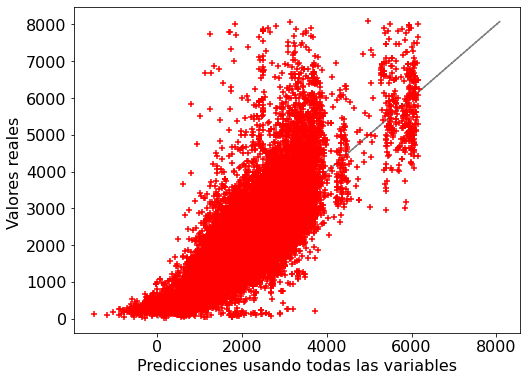

In [480]:
# Hacemos un modelo utilizando todos los features
X_todo = data[data.columns.difference(["price_usd_per_m2"])]
y_todo = data['price_usd_per_m2']
rlm_func_orig(X_todo,y_todo)

### 4.3.5 RLM con TODOS los features (dummies incluidos) **con normalizacion**  (usando Scale)

In [481]:
X_todo = preprocessing.scale(data[data.columns.difference(["price_usd_per_m2"])])
y_todo = preprocessing.scale(data['price_usd_per_m2'])
rlm_func(X_todo,y_todo)

    
    Intercepto	-4180768300.4419
    MAE		52451985281.8766
    MSE		6.168589168304743e+24
    RMSE	2483664463711.784
    R2		-6.808241105778512e+24
    


    
    Intercepto	0.0
    MAE		0.4017
    MSE		0.34
    RMSE	0.5831
    R2		0.66
    


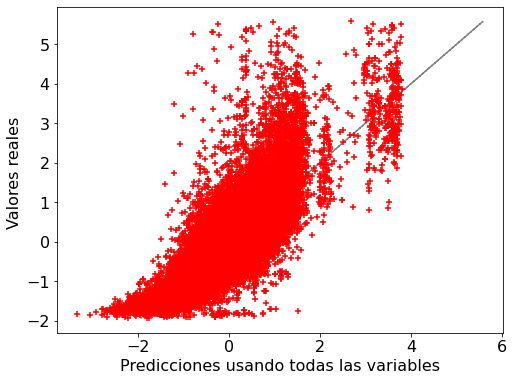

In [482]:
# Hacemos un modelo utilizando todos los features
X_todo = preprocessing.scale(data[data.columns.difference(["price_usd_per_m2"])])
y_todo = preprocessing.scale(data['price_usd_per_m2'])
rlm_func_orig(X_todo,y_todo)

###  **<font color='red'>4.4 Siguientes pasos R2 ajustado y regularización </font>**